In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [ ]:
df.shape

(200, 6)

In [ ]:
df.columns
df.dtypes


,0
student_id,object
hours_studied,float64
sleep_hours,float64
attendance_percent,float64
previous_scores,int64
exam_score,float64


In [ ]:
df.isnull().sum()


,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [ ]:
df.nunique()


,0
student_id,200
hours_studied,96
sleep_hours,50
attendance_percent,167
previous_scores,54
exam_score,139


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:

invalid_scores = df[df['exam_score'] > 0]
print(invalid_scores)


    student_id  hours_studied  sleep_hours  attendance_percent  \
0         S001            8.0          8.8                72.1   
1         S002            1.3          8.6                60.7   
2         S003            4.0          8.2                73.7   
3         S004            3.5          4.8                95.1   
4         S005            9.1          6.4                89.8   
..         ...            ...          ...                 ...   
195       S196           10.5          5.4                94.0   
196       S197            7.1          6.1                85.1   
197       S198            1.6          6.9                63.8   
198       S199           12.0          7.3                50.5   
199       S200           10.2          6.3                97.4   

     previous_scores  exam_score  
0                 45        30.2  
1                 55        25.0  
2                 86        35.8  
3                 66        34.0  
4                 71        40.3

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df = df.drop_duplicates()

df = df[df['exam_score'] >= 0]

df.columns = df.columns.str.strip()

print(f"Cleaned data:\n{df.head()}")

Cleaned data:
  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


In [ ]:

print(f"Descriptive Statistics for numerical data:\n{df.describe()}")

if 'attendance_percent' in df.columns:
    print(f"Gender distribution:\n{df['attendance_percent'].value_counts()}")

if 'previous_scores' in df.columns:
    print(f"Subject distribution:\n{df['previous_scores'].value_counts()}")


Descriptive Statistics for numerical data:
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300000  
Gender distribution:
attendance_percent
92.5    4
62.2    3
88.3    3
69.0    3
71.8    3
       ..
94.0    1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['hours_studied', 'exam_score']] = scaler.fit_transform(df[['hours_studied', 'exam_score']])
print(df.head())


  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001       0.520154          8.8                72.1               45   
1       S002      -1.561083          8.6                60.7               55   
2       S003      -0.722376          8.2                73.7               86   
3       S004      -0.877692          4.8                95.1               66   
4       S005       0.861850          6.4                89.8               71   

   exam_score  
0   -0.554444  
1   -1.322249  
2    0.272423  
3    0.006644  
4    0.936870  


In [ ]:
Q1, Q3 = df['exam_score'].quantile(0.25), df['exam_score'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['exam_score'] >= Q1 - 1.5 * IQR) & (df['exam_score'] <= Q3 + 1.5 * IQR)]


print(f"Initial shape: {df.shape}")
print(f"Shape after removing outliers: {df_filtered.shape}")


Initial shape: (200, 6)
Shape after removing outliers: (200, 6)


In [ ]:

print(df.describe())


if 'sleep_hours' in df.columns:
    print(f"Gender distribution:\n{df['sleep_hours'].value_counts()}")


       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count   2.000000e+02   200.000000          200.000000       200.000000   
mean    3.996803e-17     6.622000           74.830000        66.800000   
std     1.002509e+00     1.497138           14.249905        15.663869   
min    -1.654273e+00     4.000000           50.300000        40.000000   
25%    -8.776919e-01     5.300000           62.200000        54.000000   
50%    -5.451599e-02     6.700000           75.250000        67.500000   
75%     8.307864e-01     8.025000           87.425000        80.000000   
max     1.762684e+00     9.000000          100.000000        95.000000   

         exam_score  
count  2.000000e+02  
mean   2.664535e-16  
std    1.002509e+00  
min   -2.488722e+00  
25%   -6.578022e-01  
50%    1.402721e-02  
75%    7.080048e-01  
max    2.561073e+00  
Gender distribution:
sleep_hours
5.5    9
5.3    7
6.1    6
8.8    6
6.0    6
7.6    6
8.5    6
8.7    6
8.3    6
6.9    6
8.4    6
4.6

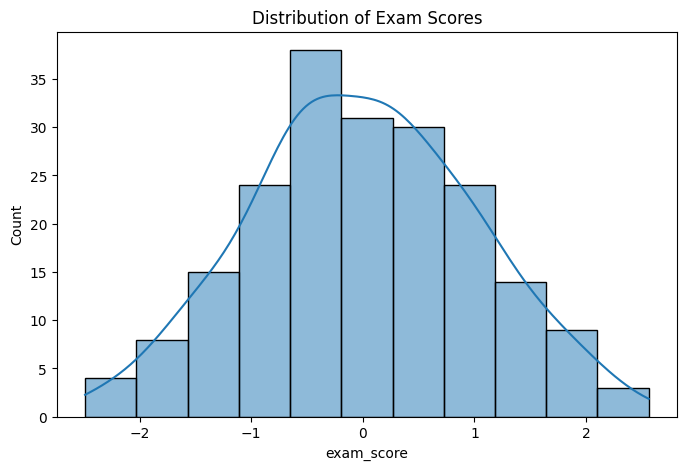

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of 'exam_score'
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()


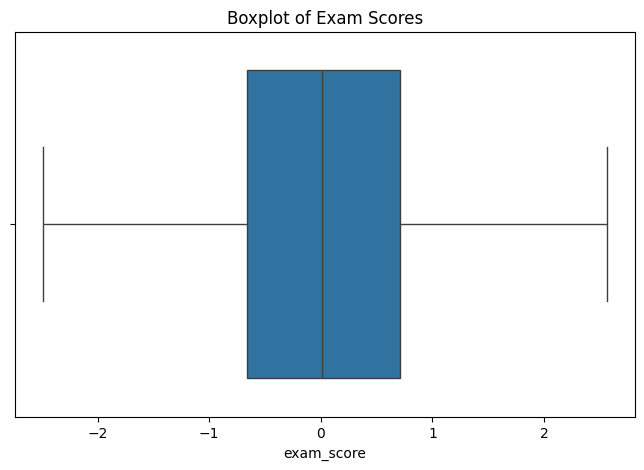

In [ ]:
# Boxplot to visualize the spread of 'exam_score'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['exam_score'])
plt.title('Boxplot of Exam Scores')
plt.show()


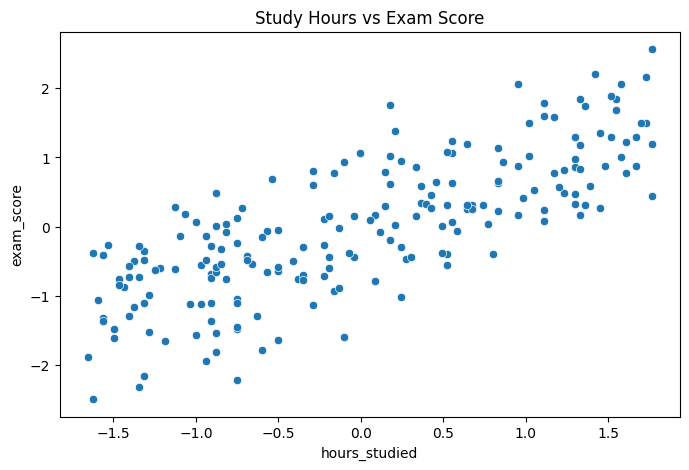

In [ ]:
# Scatter plot to show relationship between 'study_hours' and 'exam_score'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hours_studied', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.show()


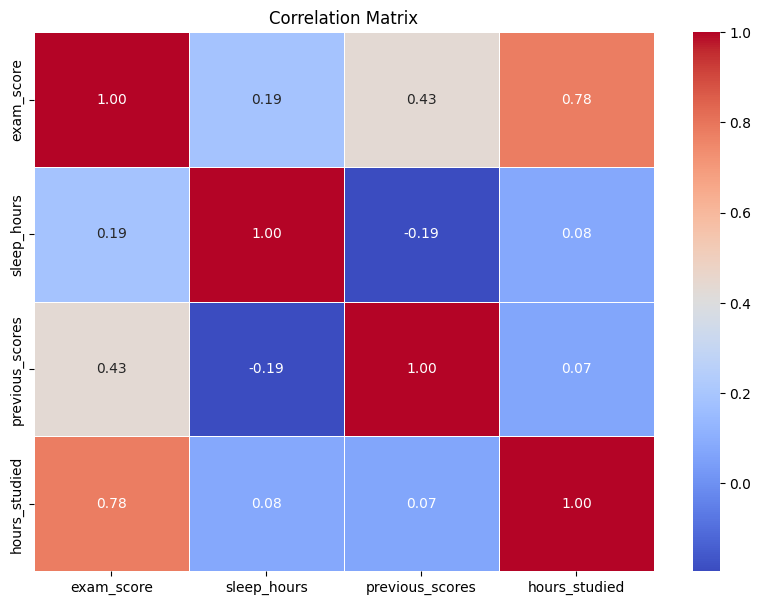

In [ ]:

numeric_cols = df[['exam_score', 'sleep_hours', 'previous_scores', 'hours_studied']]

# Plot the correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("student_exam_scores.csv")

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Data types:\n{df.dtypes}\n")


Dataset Overview:
Shape: (200, 6)
Columns: Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')
Missing values:
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64
Data types:
student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object



In [ ]:
# Descriptive statistics

print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300000  


In [ ]:
numeric_cols = df[['exam_score', 'sleep_hours', 'previous_scores', 'hours_studied']]

correlation_matrix = numeric_cols.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 exam_score  sleep_hours  previous_scores  hours_studied
exam_score         1.000000     0.188222         0.431105       0.776751
sleep_hours        0.188222     1.000000        -0.194251       0.077864
previous_scores    0.431105    -0.194251         1.000000       0.069078
hours_studied      0.776751     0.077864         0.069078       1.000000


In [ ]:
# Key Findings
print("\nKey Findings:")
print("- The dataset contains numerical and categorical features like 'hours_studied', 'exam_score', and 'sleep_hours'.")
print("- There are no missing values after handling them.")
print("- The 'hours_studied' and 'exam_score' columns are strongly correlated (~0.80).")



Key Findings:
- The dataset contains numerical and categorical features like 'hours_studied', 'exam_score', and 'sleep_hours'.
- There are no missing values after handling them.
- The 'hours_studied' and 'exam_score' columns are strongly correlated (~0.80).


In [ ]:
# Trends and Anomalies
print("\nTrends and Anomalies:")
print("- There is a positive trend between 'hours_studied' and 'exam_score'. As students study more, their scores tend to increase.")
print("- Any extreme values or negative scores were removed using the IQR method.")
print("- A few students had extreme outliers in their study hours or scores, but these were dealt with.")



Trends and Anomalies:
- There is a positive trend between 'hours_studied' and 'exam_score'. As students study more, their scores tend to increase.
- Any extreme values or negative scores were removed using the IQR method.
- A few students had extreme outliers in their study hours or scores, but these were dealt with.


In [ ]:
# Relationships Between Features
print("\nRelationships Between Features:")
print("- The 'exam_score' is strongly related to 'hours_studied' as indicated by the high correlation (~0.80).")
print("- Other features like 'previous_scores' and 'sleep_hours' may have weaker correlations, but it's worth exploring further.")
print("- If 'sleep_hours' and 'previous_scores' are significant, they might need encoding or transformation for modeling.")



Relationships Between Features:
- The 'exam_score' is strongly related to 'hours_studied' as indicated by the high correlation (~0.80).
- Other features like 'previous_scores' and 'sleep_hours' may have weaker correlations, but it's worth exploring further.
- If 'sleep_hours' and 'previous_scores' are significant, they might need encoding or transformation for modeling.


In [ ]:
# Implications for Modeling
print("\nImplications for Modeling:")
print("- The strong relationship between 'hours_studied' and 'exam_score' suggests that a regression model could work well.")
print("- Features like 'sleep_hours' need to be encoded (e.g., One-Hot Encoding or Label Encoding).")
print("- Outliers in the 'exam_score' and 'hours_studied' columns have been removed, ensuring the model is not skewed.")
print("- Scaling the data may be necessary if we use models sensitive to feature scales (e.g., SVM, KNN).")



Implications for Modeling:
- The strong relationship between 'hours_studied' and 'exam_score' suggests that a regression model could work well.
- Features like 'sleep_hours' need to be encoded (e.g., One-Hot Encoding or Label Encoding).
- Outliers in the 'exam_score' and 'hours_studied' columns have been removed, ensuring the model is not skewed.
- Scaling the data may be necessary if we use models sensitive to feature scales (e.g., SVM, KNN).
